# Load and Visualize Data
---

In [1]:
# import
import numpy as np
import scipy as sp
import pandas as pd
from pandas.tools.plotting import scatter_matrix

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.lda import LDA

from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import sklearn.ensemble as se
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import BernoulliRBM, rbm

from sknn.mlp import Classifier, Convolution, Layer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

height has been deprecated.



In [2]:
# data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [465]:
print train.shape
train.head(5)

(15120, 56)


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0   1       2596      51      3                               258                               0                              510            221             232            148   
1   2       2590      56      2                               212                              -6                              390            220             235            151   
2   3       2804     139      9                               268                              65                             3180            234             238            135   
3   4       2785     155     18                               242                             118                             3090            238             238            122   
4   5       2595      45      2                               153                              -1                              391            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
0                                6279                 1                 0                 0                 0           0           0           0           0           0           0           0   
1                                6225                 1                 0                 0                 0           0           0           0           0           0           0           0   
2                                6121                 1                 0                 0                 0           0           0           0           0           0           0           0   
3                                6211                 1                 0                 0                 0           0           0           0           0           0           0           0   
4                                6172                 1                 0                 0                 0           0           0           0           0           0           0           0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  \
0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
1           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
2           0           0            0            0            1            0            0            0            0            0            0            0            0            0            0   
3           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
4           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   

   Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0            0            1            0            0            0            0            0            0            0            0   
1            0            0            0            0            0            0            1            0            0            0            0      

In [318]:
print test.shape
test.head(5)

(565892, 55)


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0  15121       2680     354     14                                 0                               0                             2684            196             214            156   
1  15122       2683       0     13                                 0                               0                             2654            201             216            152   
2  15123       2713      16     15                                 0                               0                             2980            206             208            137   
3  15124       2709      24     17                                 0                               0                             2950            208             201            125   
4  15125       2706      29     19                                 0                               0                             2920            210             195            115   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
0                                6645                 1                 0                 0                 0           0           0           0           0           0           0           0   
1                                6675                 1                 0                 0                 0           0           0           0           0           0           0           0   
2                                6344                 1                 0                 0                 0           0           0           0           0           0           0           0   
3                                6374                 1                 0                 0                 0           0           0           0           0           0           0           0   
4                                6404                 1                 0                 0                 0           0           0           0           0           0           0           0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  \
0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
1           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
2           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
3           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
4           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   

   Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0            0            1            0            0            0            0            0            0            0            0   
1            0            0            0            0            0            0            1            0            0            0    

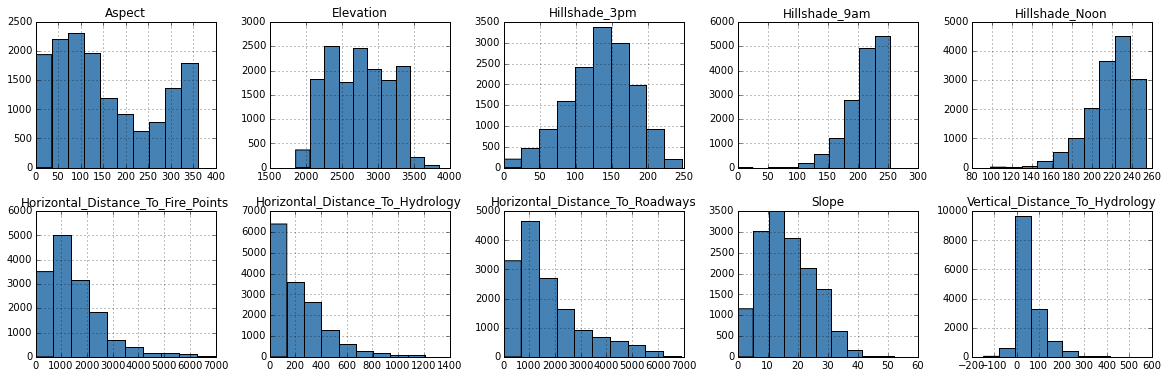

In [18]:
# variable histogram
train[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points',
       'Hillshade_9am','Hillshade_Noon','Hillshade_3pm']].hist(figsize=(20,6),color="steelblue",layout=(2,5));

In [20]:
y = train["Cover_Type"]

In [6]:
# preprocess train data
# save mean and standard deviation
def preprocess(df):
    columns_to_normalize = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                            'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points',
                            'Hillshade_9am','Hillshade_Noon','Hillshade_3pm']
    # transform
    for c in transformation_index.keys():
        df[c] = np.power(df[c],transformation_index[c])
    D = {}
    for c in columns_to_normalize:
        df[c] = (df[c] - df[c].mean()) / np.sqrt(df[c].var())
        D[c] = [df[c].mean(), np.sqrt(df[c].var())]
    return df, D

In [8]:
train, D = preprocess(train)

In [377]:
train_trans.to_csv("data/train_trans.csv",index=False)

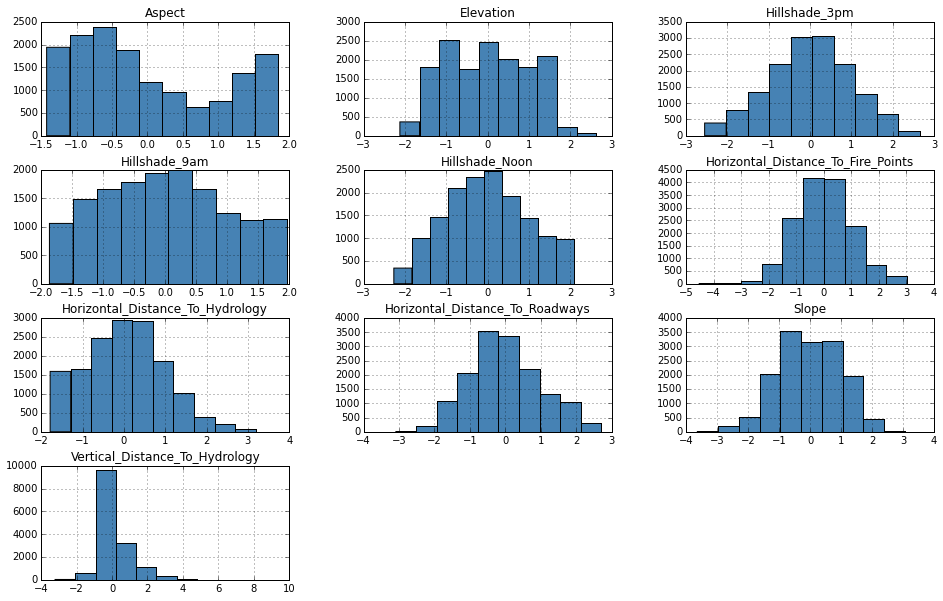

In [351]:
# variable histogram (transformed)
train[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points',
       'Hillshade_9am','Hillshade_Noon','Hillshade_3pm']].hist(figsize=(16,10),color="steelblue");

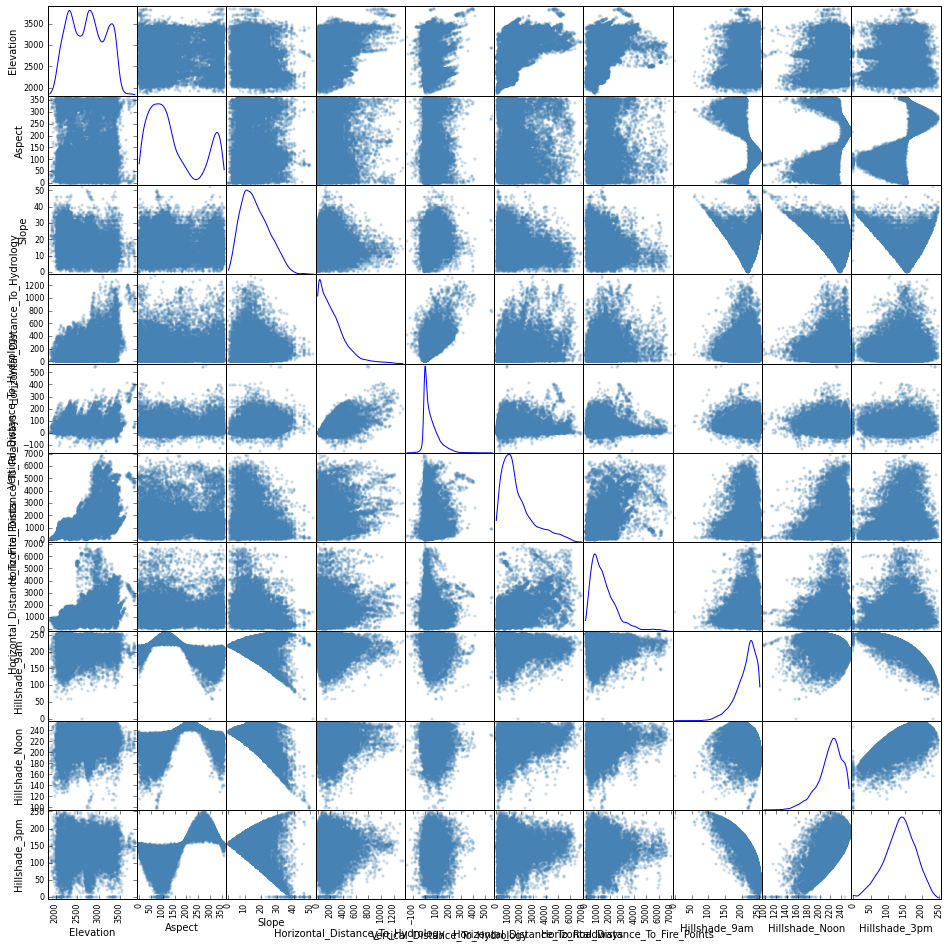

In [466]:
# scatter matrix
scatter_matrix(train[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                      'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points',
                      'Hillshade_9am','Hillshade_Noon','Hillshade_3pm']],
               alpha=0.2, figsize=(16,16), diagonal='kde', color="steelblue");

(-5, 365)

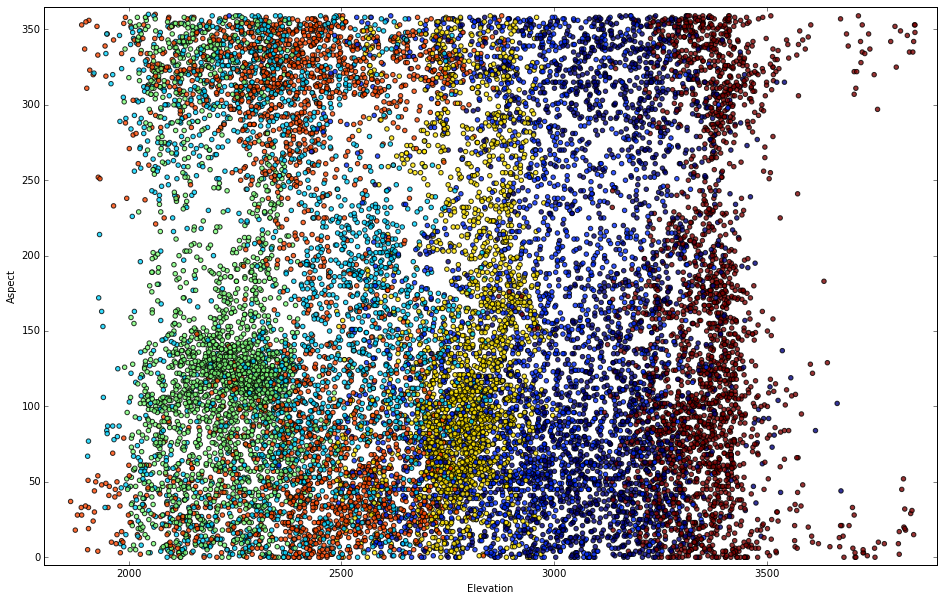

In [25]:
# some example ones
plt.figure(figsize=(16,10))
plt.scatter(train["Elevation"],train["Aspect"],c=y,alpha=0.8)
plt.xlabel("Elevation")
plt.ylabel("Aspect")
plt.xlim([1800,3900])
plt.ylim([-5,365])

(-100, 7200)

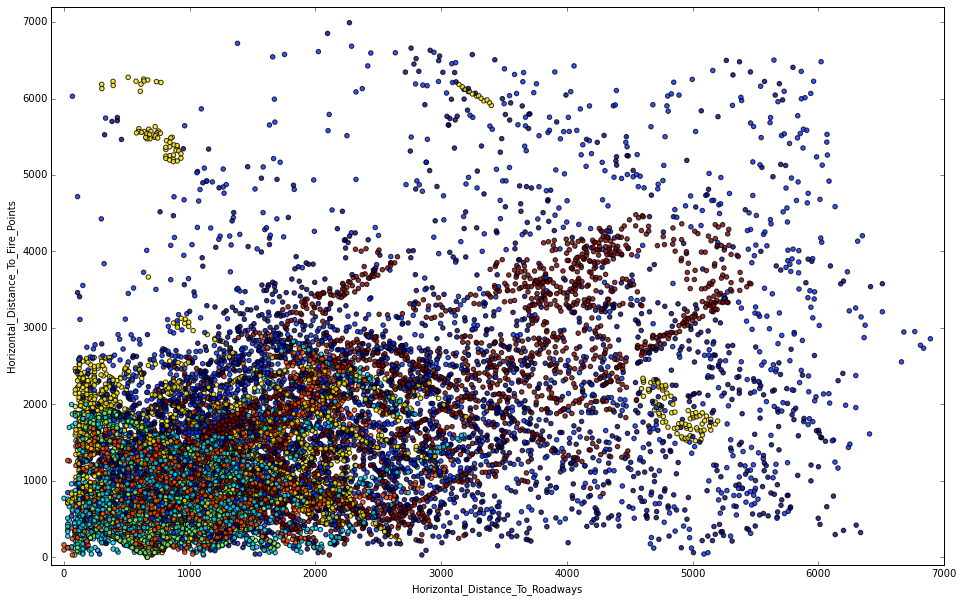

In [28]:
# some example ones
plt.figure(figsize=(16,10))
plt.scatter(train["Horizontal_Distance_To_Roadways"],train["Horizontal_Distance_To_Fire_Points"],c=y,alpha=0.8)
plt.xlabel("Horizontal_Distance_To_Roadways")
plt.ylabel("Horizontal_Distance_To_Fire_Points")
plt.xlim([-100,7000])
plt.ylim([-100,7200])

In [379]:
# frequency of cover type in train
train["Cover_Type"].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
dtype: int64

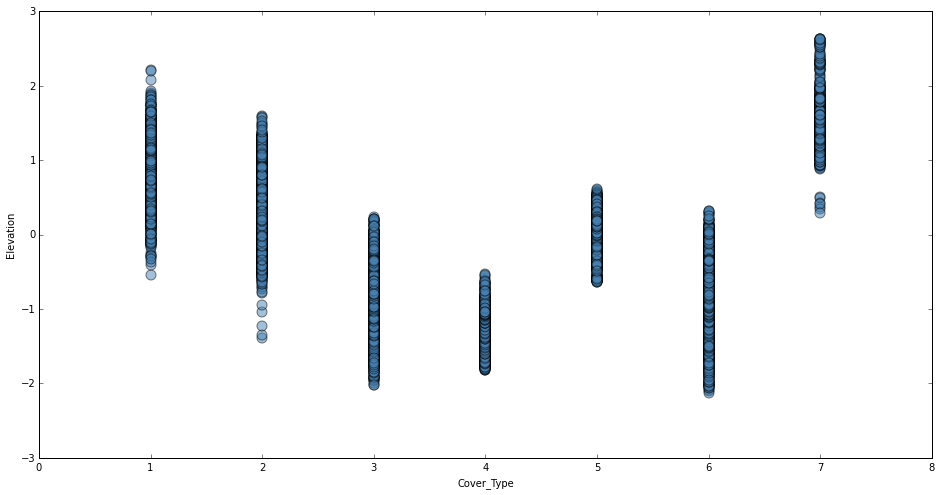

In [380]:
# elevation VS. cover type
train.plot(x="Cover_Type",y="Elevation",kind="scatter",figsize=(16,8),alpha=0.5,s=100,c="steelblue");

In [34]:
# create a categorical soil type list
soil_types = []
for i in range(train.shape[0]):
    this_row = train[filter(lambda x: x.startswith("Soil"),train.columns)].irow(i)
    this_type = int(this_row[this_row == 1].index[0][9:])
    soil_types.append(this_type)

In [31]:
# create a categorical wild animal type list
wild_types = []
for i in range(train.shape[0]):
    this_row = train[filter(lambda x: x.startswith("Wilderness"),train.columns)].irow(i)
    this_type = int(this_row[this_row == 1].index[0][-1:])
    wild_types.append(this_type)

In [35]:
train["Soil_Type_Categorical"] = soil_types
train["Wild_Type_Categorical"] = wild_types

In [79]:
train.head(5)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       2596      51      3                               258                               0                              510            221             232            148   
1       2590      56      2                               212                              -6                              390            220             235            151   
2       2804     139      9                               268                              65                             3180            234             238            135   
3       2785     155     18                               242                             118                             3090            238             238            122   
4       2595      45      2                               153                              -1                              391            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wild_Type_Categorical  
0                                6279                      1  
1                                6225                      1  
2                                6121                      1  
3                                6211                      1  
4                                6172                      1

In [36]:
soil_cover_table = pd.crosstab(train["Cover_Type"],train["Soil_Type_Categorical"])
soil_cover_table

Soil_Type_Categorical   1    2    3    4   5    6   8   9     10   11   12   13   14  16   17  18  19  20  21   22   23   24  25  26  27  28   29   30   31   32   33  34  35  36  37   38   39   40
Cover_Type                                                                                                                                                                                          
1                        0    0    0    5   0    0   0   1     9    5   24   17    0   9    2   0  15  41  12  275  376  128   0   7   7   0  407   81  114  230  184   0   3   0   0   80   79   49
2                        0    3   12   20   0    7   1   9    81   67  203   84    0  14    7  16  13  55   0   54  149   72   1  19   5   6  554  144   97  255  184  12   1   2   0    7    3    3
3                      121  283  133  462  55  248   0   0   717   89    0    4    4   5   34   0   0   0   0    0    0    0   0   0   0   0    0    0    0    5    0   0   0   0   0    0    0    0
4                      139   94  799  133  39  244   0   0   170   24    0    0  128  40  350   0   0   0   0    0    0    0   0   0   0   0    0    0    0    0    0   0   0   0   0    0    0    0
5                        0   61    0  129   0    0   0   0    64  154    0  305    0   9  131  44  18   6   0    0  157   11   0  28   0   3  254  480   87  100  115   4   0   0   0    0    0    0
6                       95  182   18   87  71  151   0   0  1101   67    0   66   37  37   88   0   0  37   0    0    3   15   0   0   0   0    0    0    7   30   66   2   0   0   0    0    0    0
7                        0    0    0    7   0    0   0   0     0    0    0    0    0   0    0   0   0   0   4   16   72   31   0   0   3   0   76   20   27   70   67   4  98   8  34  641  575  407

In [37]:
wild_table = pd.crosstab(train["Cover_Type"],train["Wild_Type_Categorical"])
wild_table

Wild_Type_Categorical     1    2     3     4
Cover_Type                                  
1                      1062  181   917     0
2                      1134   66   940    20
3                         0    0   863  1297
4                         0    0     0  2160
5                       856    0  1304     0
6                         0    0   962  1198
7                       545  252  1363     0

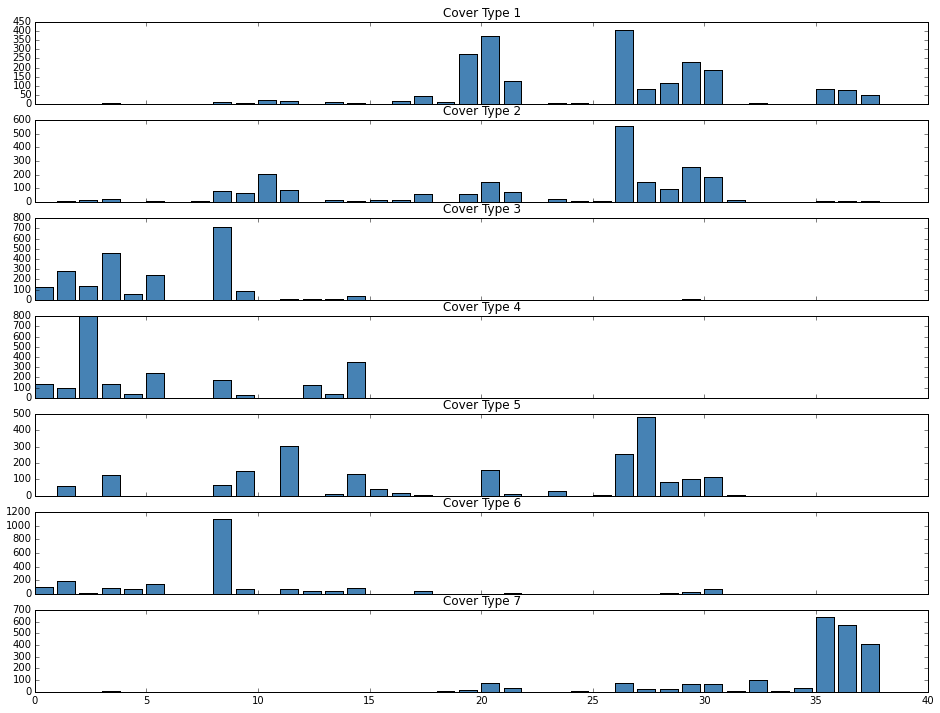

In [38]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, sharex=True,figsize=(16,12))
ax1.bar(range(38),soil_cover_table.irow(0),color="steelblue")
ax2.bar(range(38),soil_cover_table.irow(1),color="steelblue")
ax3.bar(range(38),soil_cover_table.irow(2),color="steelblue")
ax4.bar(range(38),soil_cover_table.irow(3),color="steelblue")
ax5.bar(range(38),soil_cover_table.irow(4),color="steelblue")
ax6.bar(range(38),soil_cover_table.irow(5),color="steelblue")
ax7.bar(range(38),soil_cover_table.irow(6),color="steelblue")
ax1.set_title("Cover Type 1")
ax2.set_title("Cover Type 2")
ax3.set_title("Cover Type 3")
ax4.set_title("Cover Type 4")
ax5.set_title("Cover Type 5")
ax6.set_title("Cover Type 6")
ax7.set_title("Cover Type 7")

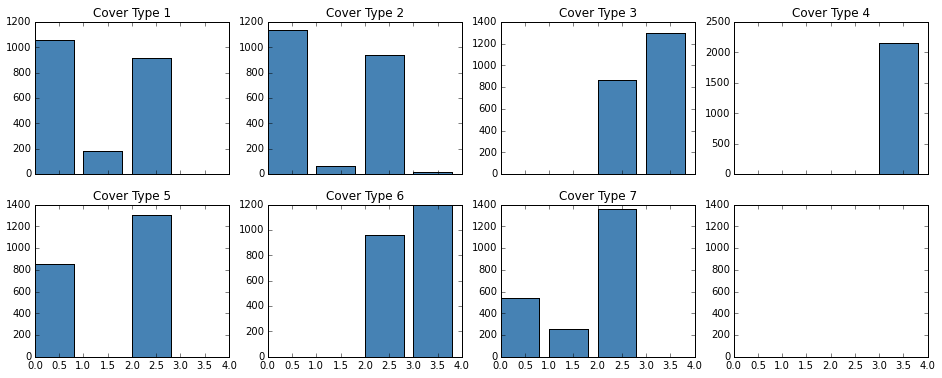

In [46]:
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, sharex=True,figsize=(16,6))
ax1.bar(range(4),wild_table.irow(0),color="steelblue")
ax2.bar(range(4),wild_table.irow(1),color="steelblue")
ax3.bar(range(4),wild_table.irow(2),color="steelblue")
ax4.bar(range(4),wild_table.irow(3),color="steelblue")
ax5.bar(range(4),wild_table.irow(4),color="steelblue")
ax6.bar(range(4),wild_table.irow(5),color="steelblue")
ax7.bar(range(4),wild_table.irow(6),color="steelblue")
ax8.bar(range(4),[0,0,0,0],color="steelblue")
ax8.set_ylim([0,1400])
ax1.set_title("Cover Type 1")
ax2.set_title("Cover Type 2")
ax3.set_title("Cover Type 3")
ax4.set_title("Cover Type 4")
ax5.set_title("Cover Type 5")
ax6.set_title("Cover Type 6")
ax7.set_title("Cover Type 7")

# PCA - 2D
---

In [105]:
trainPCA = train
y = train["Cover_Type"]
trainPCA.__delitem__("Id")
trainPCA.__delitem__("Cover_Type")
#trainPCA.__delitem__("Soil_Type_Categorical")

In [478]:
trainPCA.head(5)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       2596      51      3                               258                               0                              510            221             232            148   
1       2590      56      2                               212                              -6                              390            220             235            151   
2       2804     139      9                               268                              65                             3180            234             238            135   
3       2785     155     18                               242                             118                             3090            238             238            122   
4       2595      45      2                               153                              -1                              391            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
0                                6279                 1                 0                 0                 0           0           0           0           0           0           0           0   
1                                6225                 1                 0                 0                 0           0           0           0           0           0           0           0   
2                                6121                 1                 0                 0                 0           0           0           0           0           0           0           0   
3                                6211                 1                 0                 0                 0           0           0           0           0           0           0           0   
4                                6172                 1                 0                 0                 0           0           0           0           0           0           0           0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  \
0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
1           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
2           0           0            0            0            1            0            0            0            0            0            0            0            0            0            0   
3           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
4           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   

   Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0            0            1            0            0            0            0            0            0            0            0   
1            0            0            0            0            0            0            1            0            0            0            0            0            0    

In [479]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(trainPCA)

In [480]:
print(sum(pca2.explained_variance_ratio_))

0.947626677288


(-5000, 4000)

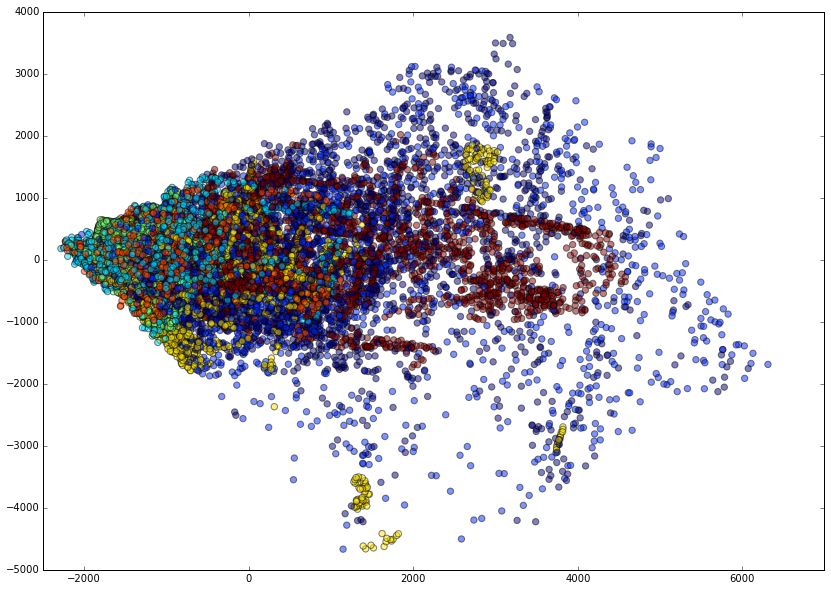

In [483]:
plt.figure(figsize=(14,10))
plt.scatter(X_pca2[:,0],X_pca2[:,1],c=y,s=40,alpha=0.5)
plt.xlim([-2500,7000])
plt.ylim([-5000,4000])

PCA - 3D
--

In [484]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(trainPCA)

In [485]:
print(sum(pca3.explained_variance_ratio_))

0.983479329076


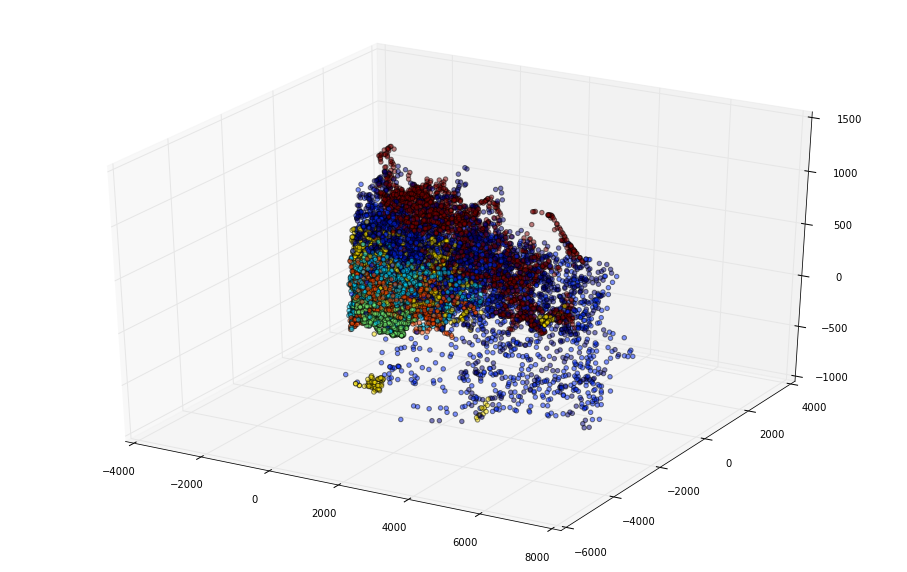

In [486]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], zdir='z', s=20, c=y, alpha=0.5)

# LDA 2D & 3D
---

In [487]:
trainLDA = train
#trainLDA.__delitem__("Id")
#trainLDA.__delitem__("Cover_Type")
#trainLDA.__delitem__("Soil_Type_Categorical")

In [488]:
trainLDA.head(5)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       2596      51      3                               258                               0                              510            221             232            148   
1       2590      56      2                               212                              -6                              390            220             235            151   
2       2804     139      9                               268                              65                             3180            234             238            135   
3       2785     155     18                               242                             118                             3090            238             238            122   
4       2595      45      2                               153                              -1                              391            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
0                                6279                 1                 0                 0                 0           0           0           0           0           0           0           0   
1                                6225                 1                 0                 0                 0           0           0           0           0           0           0           0   
2                                6121                 1                 0                 0                 0           0           0           0           0           0           0           0   
3                                6211                 1                 0                 0                 0           0           0           0           0           0           0           0   
4                                6172                 1                 0                 0                 0           0           0           0           0           0           0           0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  \
0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
1           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
2           0           0            0            0            1            0            0            0            0            0            0            0            0            0            0   
3           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
4           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   

   Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0            0            1            0            0            0            0            0            0            0            0   
1            0            0            0            0            0            0            1            0            0            0            0            0            0    

In [489]:
lda2 = LDA(n_components=2)
X_lda2 = lda2.fit_transform(trainLDA,y)

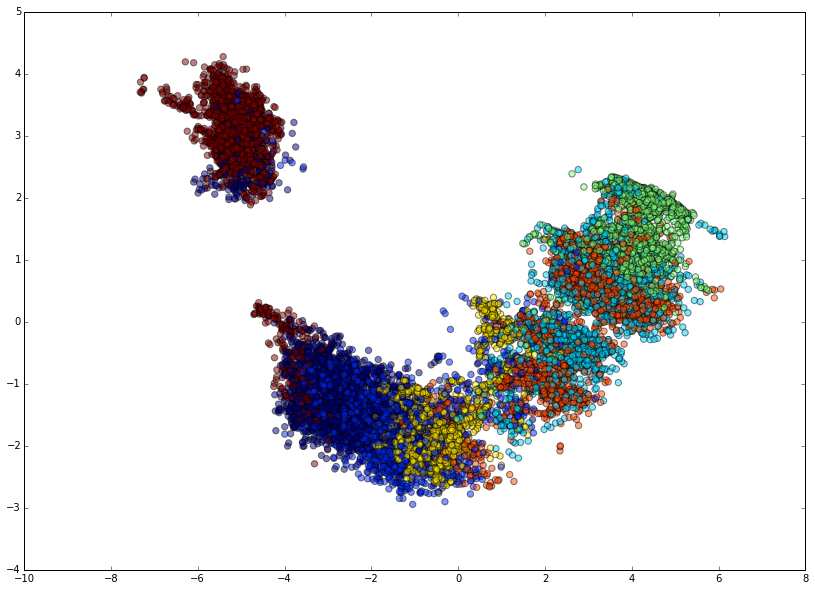

In [490]:
plt.figure(figsize=(14,10))
plt.scatter(X_lda2[:,0],X_lda2[:,1],c=y,s=40,alpha=0.5)

In [491]:
lda3 = LDA(n_components=3)
X_lda3 = lda3.fit_transform(trainLDA,y)

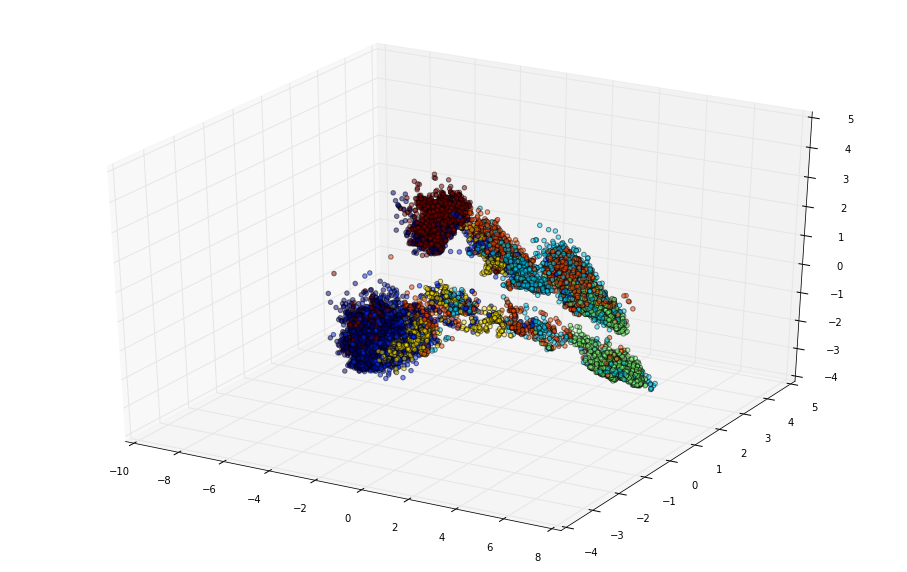

In [493]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_lda3[:,0], X_lda3[:,1], X_lda3[:,2], zdir='z', s=20, c=y, alpha=0.5)

# Preparation
---

In [39]:
# function to calculate fitting and prediction error
def errFn(y,yhat):
    diff = np.array(y)-np.array(yhat)
    binary = diff != 0
    return float(sum(binary)) / len(y)

In [21]:
# function to write submission output file
def outputSubmission(model,name):
    print "making predictions ......"
    predicted = model.predict(test)
    # write
    print "writing submission file ......"
    w = open("submission/"+name+".csv","w")
    w.write("Id,Cover_Type\n")
    test_ids = real_test["Id"]
    for i in range(len(predicted)):
        w.write(str(test_ids[i])+","+str(predicted[i])+"\n")
    w.close()

In [3]:
# split train data into train and validation
train = pd.read_csv("data/train.csv")
# test = pd.read_csv("data/test.csv")
y = train["Cover_Type"]
# train, D = preprocess(train)
train.__delitem__("Id")
train.__delitem__("Cover_Type")
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.10, random_state=20422438)

In [497]:
X_train.to_csv("data/X_train.csv",header=True,index=False)
y_train.to_csv("data/y_train.csv",header=True,index=False)
X_test.to_csv("data/X_test.csv",header=True,index=False)
y_test.to_csv("data/y_test.csv",header=True,index=False)

In [498]:
# densed train and test
def var_conv(df):
    # create a categorical soil type list
    soil_types = []
    for i in range(train.shape[0]):
        this_row = train[filter(lambda x: x.startswith("Soil"),train.columns)].irow(i)
        this_type = int(this_row[this_row == 1].index[0][9:])
        soil_types.append(this_type)
    for x in filter(lambda x: x.startswith("Soil"),train.columns):
        df.__delitem__(x)
    df["soil_type"] = soil_types

    # create a categorical wilderness type list
    wild_types = []
    for i in range(train.shape[0]):
        this_row = train[filter(lambda x: x.startswith("Wilderness"),train.columns)].irow(i)
        this_type = int(this_row[this_row == 1].index[0][-1:])
        wild_types.append(this_type)
    for x in filter(lambda x: x.startswith("Wilderness"),train.columns):
        df.__delitem__(x)
    df["wild_type"] = soil_types
    return df

In [123]:
# split train data into train and validation
train = pd.read_csv("data/train.csv")
y = train["Cover_Type"]
# train = var_conv(train)
train.__delitem__("Id")
train.__delitem__("Cover_Type")
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.10, random_state=20422438)

In [99]:
X_train.to_csv("data/X_train_dense.csv",header=True,index=False)
y_train.to_csv("data/y_train_dense.csv",header=True,index=False)
X_test.to_csv("data/X_test_dense.csv",header=True,index=False)
y_test.to_csv("data/y_test_dense.csv",header=True,index=False)

In [501]:
print "train X: ", X_train.shape
print "test  X: ", X_test.shape
print "train y: ", y_train.shape
print "test  y: ", y_test.shape

train X:  (13608, 54)
test  X:  (1512, 54)
train y:  (13608,)
test  y:  (1512,)


In [4]:
print train.shape
train.head(5)

(15120, 54)


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       2596      51      3                               258                               0                              510            221             232            148   
1       2590      56      2                               212                              -6                              390            220             235            151   
2       2804     139      9                               268                              65                             3180            234             238            135   
3       2785     155     18                               242                             118                             3090            238             238            122   
4       2595      45      2                               153                              -1                              391            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
0                                6279                 1                 0                 0                 0           0           0           0           0           0           0           0   
1                                6225                 1                 0                 0                 0           0           0           0           0           0           0           0   
2                                6121                 1                 0                 0                 0           0           0           0           0           0           0           0   
3                                6211                 1                 0                 0                 0           0           0           0           0           0           0           0   
4                                6172                 1                 0                 0                 0           0           0           0           0           0           0           0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  \
0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
1           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
2           0           0            0            0            1            0            0            0            0            0            0            0            0            0            0   
3           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
4           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   

   Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0            0            1            0            0            0            0            0            0            0            0   
1            0            0            0            0            0            0            1            0            0            0            0            0            0    

# Study test data
---

In [12]:
test = pd.read_csv("data/test.csv")

In [13]:
test.__delitem__("Id")

In [14]:
print test.shape
test.head(5)

(565892, 54)


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       2680     354     14                                 0                               0                             2684            196             214            156   
1       2683       0     13                                 0                               0                             2654            201             216            152   
2       2713      16     15                                 0                               0                             2980            206             208            137   
3       2709      24     17                                 0                               0                             2950            208             201            125   
4       2706      29     19                                 0                               0                             2920            210             195            115   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
0                                6645                 1                 0                 0                 0           0           0           0           0           0           0           0   
1                                6675                 1                 0                 0                 0           0           0           0           0           0           0           0   
2                                6344                 1                 0                 0                 0           0           0           0           0           0           0           0   
3                                6374                 1                 0                 0                 0           0           0           0           0           0           0           0   
4                                6404                 1                 0                 0                 0           0           0           0           0           0           0           0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  \
0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
1           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
2           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
3           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
4           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   

   Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0            0            1            0            0            0            0            0            0            0            0   
1            0            0            0            0            0            0            1            0            0            0            0            0            0    

In [16]:
test.max()

Elevation                             3858
Aspect                                 360
Slope                                   66
Horizontal_Distance_To_Hydrology      1397
Vertical_Distance_To_Hydrology         601
Horizontal_Distance_To_Roadways       7117
Hillshade_9am                          254
Hillshade_Noon                         254
Hillshade_3pm                          254
Horizontal_Distance_To_Fire_Points    7173
Wilderness_Area1                         1
Wilderness_Area2                         1
Wilderness_Area3                         1
Wilderness_Area4                         1
Soil_Type1                               1
Soil_Type2                               1
Soil_Type3                               1
Soil_Type4                               1
Soil_Type5                               1
Soil_Type6                               1
Soil_Type7                               1
Soil_Type8                               1
Soil_Type9                               1
Soil_Type10

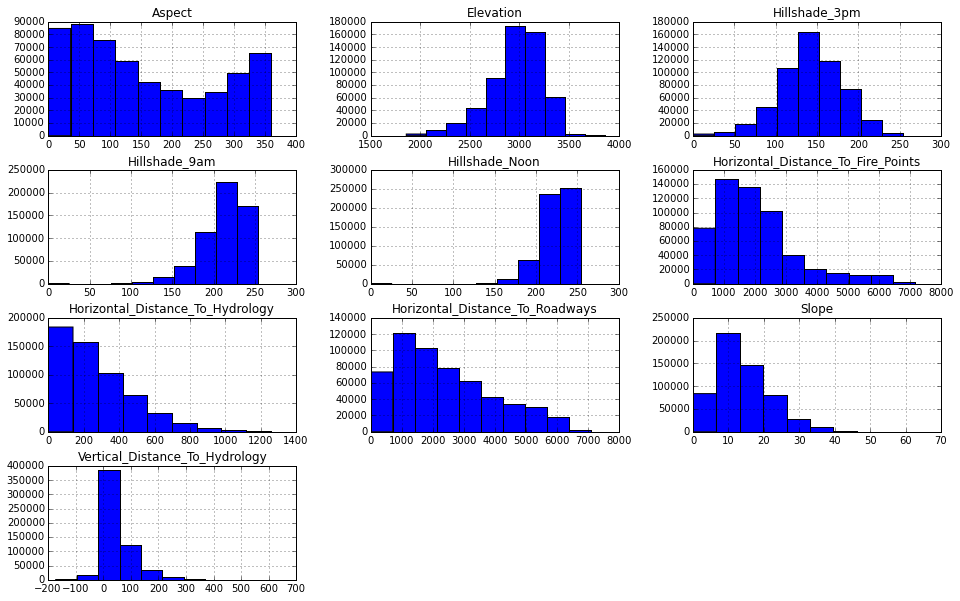

In [17]:
# variable histogram
test[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
      'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points',
      'Hillshade_9am','Hillshade_Noon','Hillshade_3pm']].hist(figsize=(16,10));

# Model - with default parameters
---

In [7]:
# store all models and classification error
models = {}

In [8]:
models

{}

## Logistic Regressions

In [415]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [416]:
model_lr_pred = model_lr.predict(X_test)
model_lr_error = errFn(model_lr_pred,y_test)
print model_lr_error
models["lr"] = model_lr_error

0.312169312169


## Decision Tree

In [417]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [418]:
model_tree_pred = model_tree.predict(X_test)
model_tree_error = errFn(model_tree_pred,y_test)
print model_tree_error
models["tree"] = model_tree_error

0.198412698413


## Random Forest

In [419]:
model_rf = se.RandomForestClassifier(n_jobs=-1)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [420]:
model_rf_pred = model_rf.predict(X_test)
model_rf_error = errFn(model_rf_pred,y_test)
print model_rf_error
models["rf"] = model_rf_error

0.161375661376


## Extremely Randomized Trees

In [421]:
model_erf = se.ExtraTreesClassifier(n_jobs=-1)
model_erf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [422]:
model_erf_pred = model_erf.predict(X_test)
model_erf_error = errFn(model_erf_pred,y_test)
print model_erf_error
models["erf"] = model_erf_error

0.152116402116


## Gradient Boosting

In [423]:
model_gboost = se.GradientBoostingClassifier()
model_gboost.fit(X_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [424]:
model_gboost_pred = model_gboost.predict(X_test)
model_gboost_error = errFn(model_gboost_pred,y_test)
print model_gboost_error
models["gboost"] = model_gboost_error

0.193783068783


## SVM

In [425]:
model_svm = svm.LinearSVC()
model_svm.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [426]:
model_svm_pred = model_svm.predict(X_test)
model_svm_error = errFn(model_svm_pred,y_test)
print model_svm_error
models["svm"] = model_svm_error

0.316798941799


## Naive Bayes

In [427]:
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)

GaussianNB()

In [428]:
model_gnb_pred = model_gnb.predict(X_test)
model_gnb_error = errFn(model_gnb_pred,y_test)
print model_gnb_error
models["gnb"] = model_gnb_error

0.530423280423


## Adaptive Boosting

In [429]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [430]:
model_ada_pred = model_ada.predict(X_test)
model_ada_error = errFn(model_ada_pred,y_test)
print model_ada_error
models["adaboost"] = model_ada_error

0.572751322751


## Stochastic Gradient Derscent

In [431]:
model_sgd = SGDClassifier(loss="hinge", penalty="l2")
model_sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [432]:
model_sgd_pred = model_sgd.predict(X_test)
model_sgd_error = errFn(model_sgd_pred,y_test)
print model_sgd_error
models["sgd"] = model_sgd_error

0.390873015873


## Neural Network

In [505]:
X_train_nn = np.array(X_train)
y_train_nn = np.array(y_train)
X_test_nn = np.array(X_test)
y_test_nn = np.array(y_test)

In [506]:
pipeline = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network', Classifier(layers=[
                                        Layer("Softmax")], n_iter=25))])
pipeline.fit(X_train_nn, y_train_nn)

/Users/yilunzhang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:256: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X *= self.scale_
/Users/yilunzhang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:257: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X += self.min_


Pipeline(steps=[('min/max scaler', MinMaxScaler(copy=True, feature_range=(0.0, 1.0))), ('neural network', Classifier(batch_size=1, debug=False, dropout_rate=None, f_stable=0.001,
      layers=[<sknn.nn.Layer `Softmax`: units=7, name=u'output', frozen=False>],
      learning_momentum=0.9, learning_rate=0.01, ...valid_set=None, valid_size=0.0,
      verbose=None, warning=None, weight_decay=None, weights=None))])

In [507]:
model_nn_pred = pipeline.predict(X_test_nn)
model_nn_error = errFn(map(lambda x: x[0],model_nn_pred),y_test)
print model_nn_error
models["nn"] = model_nn_error

0.400793650794


/Users/yilunzhang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:256: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X *= self.scale_
/Users/yilunzhang/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:257: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X += self.min_


## Parameter Tuning for extremely randomized trees

In [88]:
m_erf = se.ExtraTreesClassifier(n_jobs=-1)
m_erf.get_params

<bound method ExtraTreesClassifier.get_params of ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [143]:
# possible tunings
rng = 20422438
n_trees =  [10,50,100,500,1000,2000,2500]  # number of trees
criterions = ["gini","entropy"]       # gini impurity / information gain
min_splits = [2,3,4,5,10,20,30,40,50] # min sample size required to split
bootstrap = [False, True]             # bootstrap sampling
warm_start = [False, True]            # add more estimators to previous tree or generate a new one

In [443]:
# vs. number of trees
error_rate_by_ntree = {}
for i in n_trees:
    print i
    model_erf = se.ExtraTreesClassifier(random_state=rng,n_jobs=-1,n_estimators=i)
    model_erf.fit(X_train,y_train)
    model_erf_pred = model_erf.predict(X_test)
    model_erf_error = errFn(model_erf_pred,y_test)
    print model_erf_error
    error_rate_by_ntree[i] = model_erf_error

10
0.150132275132
50
0.140873015873
100
0.130952380952
500
0.136243386243
1000
0.135582010582
2000
0.131613756614
2500
0.133597883598


(-10, 2510)

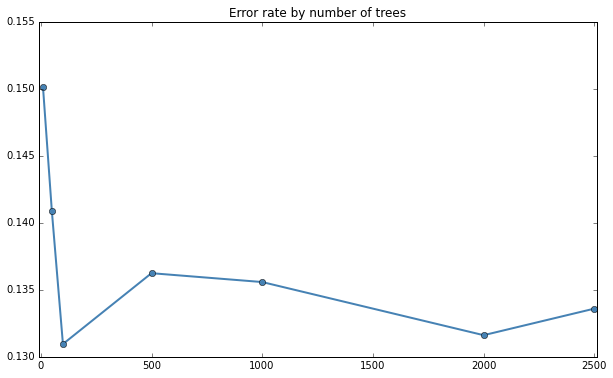

In [445]:
plt.figure(figsize=(10,6))
plt.plot(sorted(error_rate_by_ntree.keys()),[error_rate_by_ntree[x] for x in sorted(error_rate_by_ntree.keys())],"-o",
        c="steelblue",linewidth=2)
plt.title("Error rate by number of trees")
plt.xlim([-10,2510])

In [446]:
# vs. criterion
error_rate_by_criterion = {}
for i in criterions:
    print i
    model_erf = se.ExtraTreesClassifier(random_state=rng,n_jobs=-1,criterion=i)
    model_erf.fit(X_train,y_train)
    model_erf_pred = model_erf.predict(X_test)
    model_erf_error = errFn(model_erf_pred,y_test)
    print model_erf_error
    error_rate_by_criterion[i] = model_erf_error

gini
0.150132275132
entropy
0.144841269841


In [447]:
# vs. min sample split
error_rate_by_min_split = {}
for i in min_splits:
    print i
    model_erf = se.ExtraTreesClassifier(random_state=rng,n_jobs=-1,min_samples_split=i)
    model_erf.fit(X_train,y_train)
    model_erf_pred = model_erf.predict(X_test)
    model_erf_error = errFn(model_erf_pred,y_test)
    print model_erf_error
    error_rate_by_min_split[i] = model_erf_error

2
0.150132275132
3
0.160714285714
4
0.146164021164
5
0.156746031746
10
0.171296296296
20
0.184523809524
30
0.195105820106
40
0.202380952381
50
0.207010582011


(0, 52)

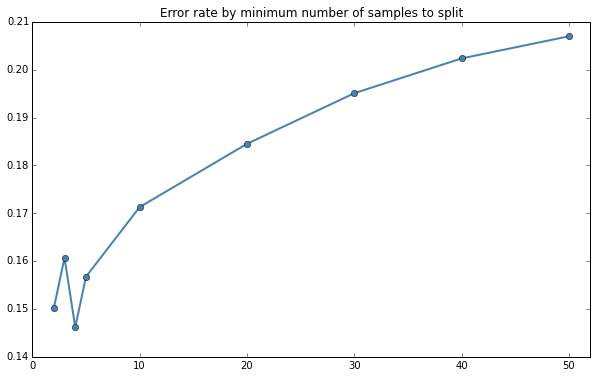

In [448]:
plt.figure(figsize=(10,6))
plt.plot(sorted(error_rate_by_min_split.keys()),
         [error_rate_by_min_split[x] for x in sorted(error_rate_by_min_split.keys())],"-o",
        c="steelblue",linewidth=2)
plt.title("Error rate by minimum number of samples to split")
plt.xlim([0,52])

In [449]:
# vs. bootstrap sample
error_rate_by_bootstrap = {}
for i in bootstrap:
    print i
    model_erf = se.ExtraTreesClassifier(random_state=rng,n_jobs=-1,bootstrap=i)
    model_erf.fit(X_train,y_train)
    model_erf_pred = model_erf.predict(X_test)
    model_erf_error = errFn(model_erf_pred,y_test)
    print model_erf_error
    error_rate_by_bootstrap[i] = model_erf_error

False
0.150132275132
True
0.172619047619


In [450]:
# vs. warm start
error_rate_by_warm_start = {}
for i in bootstrap:
    print i
    model_erf = se.ExtraTreesClassifier(random_state=rng,n_jobs=-1,warm_start=i)
    model_erf.fit(X_train,y_train)
    model_erf_pred = model_erf.predict(X_test)
    model_erf_error = errFn(model_erf_pred,y_test)
    print model_erf_error
    error_rate_by_warm_start[i] = model_erf_error

False
0.150132275132
True
0.150132275132


In [451]:
# the best combination

# find the best parameters (grid search)
error_erf = pd.DataFrame(columns=["n_trees","criterions","min_splits","bootstrap","error"])

i=0
for a in [100,500,1000,2000]:
    for b in criterions:
        for c in [2,3,4,5]:
            for d in bootstrap:
                    model_erf = se.ExtraTreesClassifier(random_state=rng,n_jobs=-1,n_estimators=a,
                                                        criterion=b,min_samples_split=c,bootstrap=d)
                    model_erf.fit(X_train,y_train)
                    model_erf_pred = model_erf.predict(X_test)
                    model_erf_error = errFn(model_erf_pred,y_test)
                    error_erf.loc[i] = [a,b,c,d,model_erf_error]
                    i += 1;

In [452]:
# the best one
error_erf[error_erf["error"] == error_erf["error"].min()]

n_trees criterions  min_splits bootstrap     error
0      100       gini           2     False  0.130952

In [453]:
error_erf.to_csv("trans_yes/error_erf.csv",index=False)

## Parameter Tuning for gradient boosting

In [454]:
model_gb = se.GradientBoostingClassifier()
model_gb.get_params

<bound method GradientBoostingClassifier.get_params of GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)>

In [90]:
# possible tunings
rng = 20422438
learning_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] # learning rate
n_estimators = [10,50,100,200,500,1000]          # number of estimators
loss = ["deviance","exponential"]                # loss function, exponential loss fn is only for 2 classes
min_splits = [2,3,4,5,10,20,30,40,50]            # min sample size required to split

In [457]:
# vs. learning rate
gb_error_by_learning_rate = {}
for i in learning_rates:
    print i
    model_gb = se.GradientBoostingClassifier(random_state=rng,learning_rate=i)
    model_gb.fit(X_train,y_train)
    model_gb_pred = model_gb.predict(X_test)
    model_gb_error = errFn(model_gb_pred,y_test)
    print model_gb_error
    gb_error_by_learning_rate[i] = model_gb_error

0.1
0.194444444444
0.2
0.17328042328
0.3
0.167328042328
0.4
0.156084656085
0.5
0.162037037037
0.6
0.175264550265
0.7
0.164021164021
0.8
0.174603174603
0.9
0.18253968254
1
0.292989417989


(0, 1.1)

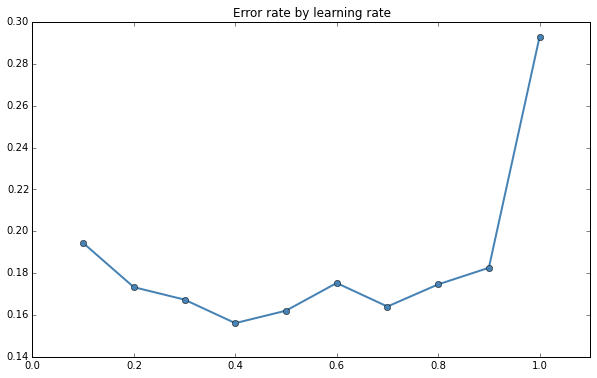

In [458]:
plt.figure(figsize=(10,6))
plt.plot(sorted(gb_error_by_learning_rate.keys()),
         [gb_error_by_learning_rate[x] for x in sorted(gb_error_by_learning_rate.keys())],"-o",
        c="steelblue",linewidth=2)
plt.title("Error rate by learning rate")
plt.xlim([0,1.1])

In [460]:
# vs. n estimator
gb_error_by_n_est = {}
for i in n_estimators:
    print i
    model_gb = se.GradientBoostingClassifier(random_state=rng,n_estimators=i)
    model_gb.fit(X_train,y_train)
    model_gb_pred = model_gb.predict(X_test)
    model_gb_error = errFn(model_gb_pred,y_test)
    print model_gb_error
    gb_error_by_n_est[i] = model_gb_error

10
0.290343915344
50
0.231481481481
100
0.194444444444
200
0.167989417989
500
0.157407407407
1000
0.154100529101


(-10, 1010)

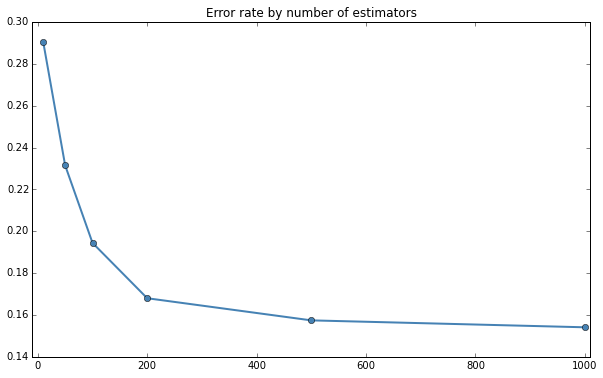

In [461]:
plt.figure(figsize=(10,6))
plt.plot(sorted(gb_error_by_n_est.keys()),
         [gb_error_by_n_est[x] for x in sorted(gb_error_by_n_est.keys())],"-o",
        c="steelblue",linewidth=2)
plt.title("Error rate by number of estimators")
plt.xlim([-10,1010])

In [462]:
# vs. min sample splits
gb_error_by_min_splits = {}
for i in min_splits:
    print i
    model_gb = se.GradientBoostingClassifier(random_state=rng,min_samples_split=i)
    model_gb.fit(X_train,y_train)
    model_gb_pred = model_gb.predict(X_test)
    model_gb_error = errFn(model_gb_pred,y_test)
    print model_gb_error
    gb_error_by_min_splits[i] = model_gb_error

2
0.194444444444
3
0.20171957672
4
0.197751322751
5
0.201058201058
10
0.197751322751
20
0.198412698413
30
0.203042328042
40
0.199735449735
50
0.199074074074


(0, 52)

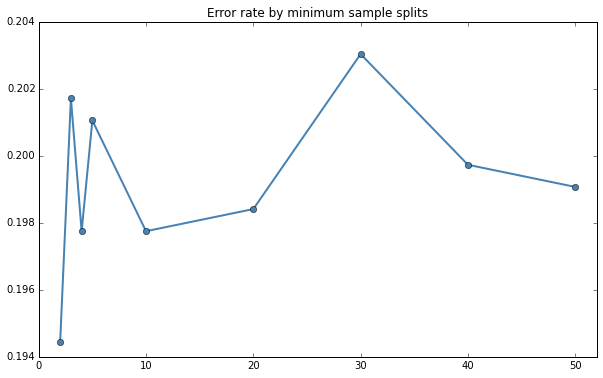

In [463]:
plt.figure(figsize=(10,6))
plt.plot(sorted(gb_error_by_min_splits.keys()),
         [gb_error_by_min_splits[x] for x in sorted(gb_error_by_min_splits.keys())],"-o",
        c="steelblue",linewidth=2)
plt.title("Error rate by minimum sample splits")
plt.xlim([0,52])

In [158]:
# the best combination

# find the best parameters (grid search)
error_gb = pd.DataFrame(columns=["learning_rate","n_estimators","min_splits","error"])

i=0
for a in [0.3,0.4,0.5,0.6,0.7]: # learning rate
    for b in [500,1000,2000]: # num estimators
        for c in [2,3,4,5]: # min split
            print i
            model_gb = se.GradientBoostingClassifier(random_state=rng,learning_rate=a,
                                                     n_estimators=b,min_samples_split=c)
            model_gb.fit(X_train,y_train)
            model_gb_pred = model_gb.predict(X_test)
            model_gb_error = errFn(model_gb_pred,y_test)
            error_gb.loc[i] = [a,b,c,model_gb_error]
            i += 1;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [314]:
# the best one
error_gb[error_gb["error"] == error_gb["error"].min()]

learning_rate  n_estimators  min_splits     error
9            0.3          2000           3  0.140212

In [315]:
error_gb.to_csv("trans_no/error_gb.csv",index=False)

In [7]:
model_best_gb = se.GradientBoostingClassifier(random_state=20422438,learning_rate=0.3,
                                              n_estimators=2000,min_samples_split=3)
model_best_gb.fit(train,y)
model_best_gb_pred = model_best_gb.predict(test)

In [11]:
w = open("submission/"+"best_gb"+".csv","w")
w.write("Id,Cover_Type\n")
for i in range(len(model_best_gb_pred)):
    w.write(str(test_ids[i])+","+str(model_best_gb_pred[i])+"\n")
w.close()

# ERF train vs test error

In [92]:
model_erf = model_erf = se.ExtraTreesClassifier(random_state=rng,n_jobs=-1,n_estimators=100,
                                                criterion="gini",min_samples_split=2,bootstrap=False)

In [95]:
model_erf.fit(X_train,y_train)
model_erf_pred = model_erf.predict(X_test)
model_erf_pred_train = model_erf.predict(X_train)
model_erf_error = errFn(model_erf_pred,y_test)
model_erf_error_train = errFn(model_erf_pred_train,y_train)
print model_erf_error
print model_erf_error_train

0.134920634921
0.0


# 2 way interaction between all numerical variables

In [22]:
# split train data into train and validation
train = pd.read_csv("data/train.csv")
y = train["Cover_Type"]
train.__delitem__("Id")
train.__delitem__("Cover_Type")
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.10, random_state=20422438)

In [23]:
# test data
test = pd.read_csv("data/test.csv")
test_ids = test["Id"]
test.__delitem__("Id")

In [24]:
train_interaction = train

In [9]:
print train_interaction.shape
train_interaction.head(5)

(15120, 54)


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       2596      51      3                               258                               0                              510            221             232            148   
1       2590      56      2                               212                              -6                              390            220             235            151   
2       2804     139      9                               268                              65                             3180            234             238            135   
3       2785     155     18                               242                             118                             3090            238             238            122   
4       2595      45      2                               153                              -1                              391            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
0                                6279                 1                 0                 0                 0           0           0           0           0           0           0           0   
1                                6225                 1                 0                 0                 0           0           0           0           0           0           0           0   
2                                6121                 1                 0                 0                 0           0           0           0           0           0           0           0   
3                                6211                 1                 0                 0                 0           0           0           0           0           0           0           0   
4                                6172                 1                 0                 0                 0           0           0           0           0           0           0           0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  \
0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
1           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
2           0           0            0            0            1            0            0            0            0            0            0            0            0            0            0   
3           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
4           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   

   Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0            0            1            0            0            0            0            0            0            0            0   
1            0            0            0            0            0            0            1            0            0            0            0            0            0    

In [25]:
cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points',
       'Hillshade_9am','Hillshade_Noon','Hillshade_3pm']

In [26]:
# add 2 way interactions
for c1 in cols:
    for c2 in cols:
        if (c1+"."+c2 not in train_interaction.columns) and (c2+"."+c1 not in train_interaction.columns):
            train_interaction[c1+"."+c2] = train[c1]*train[c2]

In [27]:
train_interaction.shape

(15120, 109)

In [13]:
train_interaction.isnull().sum().sum()

0

In [14]:
X_train_int, X_test_int, y_train, y_test = train_test_split(train_interaction,y,test_size=0.10,random_state=20422438)

In [30]:
# add 2 way interactions for test data
test_interaction = test
# add 2 way interactions
for c1 in cols:
    for c2 in cols:
        if (c1+"."+c2 not in test_interaction.columns) and (c2+"."+c1 not in test_interaction.columns):
            test_interaction[c1+"."+c2] = test[c1]*test[c2]

In [31]:
test_interaction.shape

(565892, 109)

In [32]:
test_interaction.isnull().sum().sum()

0

## fit

In [140]:
# test model
model_erf = se.ExtraTreesClassifier(random_state=20422438,n_jobs=-1,n_estimators=1000)
model_erf.fit(X_train_int,y_train)
model_erf_pred = model_erf.predict(X_test_int)
model_erf_error = errFn(model_erf_pred,y_test)
print model_erf_error

0.115079365079


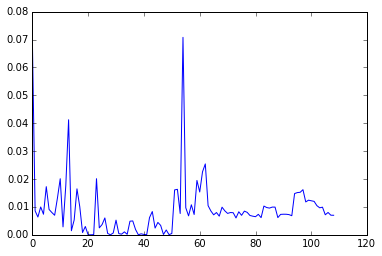

In [141]:
plt.plot(model_erf.feature_importances_)

In [144]:
# Grid search

# find the best parameters (grid search)
error_erf_interaction = pd.DataFrame(columns=["n_trees","criterions","min_splits","bootstrap","error"])

i=0
for a in [100,500,1000,2000]:
    for b in criterions:
        for c in [2,3,4,5]:
            for d in bootstrap:
                    model_erf = se.ExtraTreesClassifier(random_state=rng,n_jobs=-1,n_estimators=a,
                                                        criterion=b,min_samples_split=c,bootstrap=d)
                    model_erf.fit(X_train_int,y_train)
                    model_erf_pred = model_erf.predict(X_test_int)
                    model_erf_error = errFn(model_erf_pred,y_test)
                    error_erf_interaction.loc[i] = [a,b,c,d,model_erf_error]
                    i += 1;

In [146]:
error_erf_interaction[error_erf_interaction["error"] == error_erf_interaction["error"].min() ]

n_trees criterions  min_splits bootstrap     error
48     2000       gini           2     False  0.112434

In [ ]:
# all data model
model_best_erf = se.ExtraTreesClassifier(random_state=20422438,n_jobs=-1,n_estimators=1000,min_samples_split=2,
                                         criterion="gini")
model_best_erf.fit(train_interaction,y)

In [ ]:
model_best_erf_pred = model_best_erf.predict(test_interaction)

In [ ]:
train_interaction.shape

In [82]:
w = open("submission/"+"interaction_erf_split3"+".csv","w")
w.write("Id,Cover_Type\n")
test_ids = test_id
for i in range(len(model_best_erf_pred)):
    w.write(str(test_ids[i])+","+str(model_best_erf_pred[i])+"\n")
w.close()

# 3 way interaction between all numerical variables

In [34]:
train_3_way = train_interaction
test_3_way = test_interaction

In [35]:
# add 3 way interactions
for c1 in cols:
    for c2 in cols:
        for c3 in cols:
            if (cols.index(c1) <= cols.index(c2)) and (cols.index(c2) <= cols.index(c3)):
                train_3_way[c1+"."+c2+"."+c3] = train[c1]*train[c2]*train[c3]
                test_3_way[c1+"."+c2+"."+c3] = test[c1]*test[c2]*test[c3]

In [36]:
print train_3_way.shape
print test_3_way.shape

(15120, 329)
(565892, 329)


In [37]:
X_train_3w, X_test_3w, y_train, y_test = train_test_split(train_3_way,y,test_size=0.10,random_state=20422438)

In [117]:
# test model
model_erf = se.ExtraTreesClassifier(random_state=20422438,n_jobs=-1,n_estimators=1000)
model_erf.fit(X_train_3w,y_train)
model_erf_pred = model_erf.predict(X_test_3w)
model_erf_error = errFn(model_erf_pred,y_test)
print model_erf_error

0.128306878307


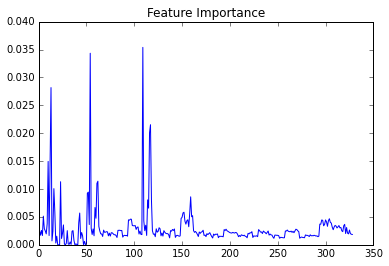

In [118]:
plt.plot(model_erf.feature_importances_)
plt.title("Feature Importance")

In [119]:
# feature selection
feat_imp = model_erf.feature_importances_

In [139]:
selected_val = feat_imp[feat_imp > 0.0025]

In [140]:
selected_index = [list(feat_imp).index(x) for x in selected_val]

In [141]:
len(selected_index)

116

In [142]:
# test model
model_erf = se.ExtraTreesClassifier(random_state=20422438,n_jobs=-1,n_estimators=1000,criterion="entropy")
model_erf.fit(X_train_3w[selected_index],y_train)
model_erf_pred = model_erf.predict(X_test_3w[selected_index])
model_erf_error = errFn(model_erf_pred,y_test)
print model_erf_error

0.119708994709


In [ ]:
# best 3-way
model_best_erf = se.ExtraTreesClassifier(n_jobs=-1,n_estimators=1000,criterion="entropy")
model_best_erf.fit(train_3_way[selected_index],y)
model_best_erf_pred = model_best_erf.predict(test_3_way[selected_index])

In [155]:
# Grid search

# find the best parameters (grid search)
error_erf_interaction_3 = pd.DataFrame(columns=["n_trees","criterions","min_splits","bootstrap","error"])

i=0
for a in [100,500,1000,2000]:
    for b in criterions:
        for c in [2,3,4,5]:
            for d in bootstrap:
                    model_erf = se.ExtraTreesClassifier(random_state=rng,n_jobs=-1,n_estimators=a,
                                                        criterion=b,min_samples_split=c,bootstrap=d)
                    model_erf.fit(X_train_3w,y_train)
                    model_erf_pred = model_erf.predict(X_test_3w)
                    model_erf_error = errFn(model_erf_pred,y_test)
                    error_erf_interaction_3.loc[i] = [a,b,c,d,model_erf_error]
                    i += 1;

In [156]:
error_erf_interaction_3[error_erf_interaction_3["error"] == error_erf_interaction_3["error"].min() ]

n_trees criterions  min_splits bootstrap     error
4      100       gini           4     False  0.123016

In [158]:
# all data model
model_best_erf = se.ExtraTreesClassifier(random_state=20422438,n_jobs=-1,n_estimators=100,criterion="gini",
                                         min_samples_split=4)
model_best_erf.fit(train_3_way,y)
model_best_erf_pred = model_best_erf.predict(test_3_way)

In [159]:
w = open("submission/"+"3_interaction_erf_best"+".csv","w")
w.write("Id,Cover_Type\n")
test_ids = test_id
for i in range(len(model_best_erf_pred)):
    w.write(str(test_ids[i])+","+str(model_best_erf_pred[i])+"\n")
w.close()

# fit best models

In [16]:
print train.shape
train.head(5)

(15120, 54)


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       2596      51      3                               258                               0                              510            221             232            148   
1       2590      56      2                               212                              -6                              390            220             235            151   
2       2804     139      9                               268                              65                             3180            234             238            135   
3       2785     155     18                               242                             118                             3090            238             238            122   
4       2595      45      2                               153                              -1                              391            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
0                                6279                 1                 0                 0                 0           0           0           0           0           0           0           0   
1                                6225                 1                 0                 0                 0           0           0           0           0           0           0           0   
2                                6121                 1                 0                 0                 0           0           0           0           0           0           0           0   
3                                6211                 1                 0                 0                 0           0           0           0           0           0           0           0   
4                                6172                 1                 0                 0                 0           0           0           0           0           0           0           0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  \
0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
1           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
2           0           0            0            0            1            0            0            0            0            0            0            0            0            0            0   
3           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   
4           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0   

   Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0            0            1            0            0            0            0            0            0            0            0   
1            0            0            0            0            0            0            1            0            0            0            0            0            0    

In [17]:
test_id = test["Id"]
test.__delitem__("Id")

In [18]:
model_best_erf = se.ExtraTreesClassifier(n_jobs=-1,n_estimators=1000,criterion="entropy",min_samples_split=2,bootstrap=False)
model_best_erf.fit(train,y)
model_best_erf_pred = model_best_erf.predict(test)

In [22]:
w = open("submission/"+"best_erf"+".csv","w")
w.write("Id,Cover_Type\n")
test_ids = test_id
for i in range(len(model_best_erf_pred)):
    w.write(str(test_ids[i])+","+str(model_best_erf_pred[i])+"\n")
w.close()